In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

import pickle
from pprint import pprint
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer
from sklearn.compose import make_column_transformer, ColumnTransformer



In [2]:
# Function que facilita la exploración básica del dataset
def summary(df):
    total_values = df.shape[0]
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / total_values) * 100
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} rows.")    
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary['Missing %'] = ((missing_data / total_values) * 100).round(2)
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

In [3]:
# Creamos los Dataframes
df =pd.read_csv('airline_passenger_satisfaction.csv')

In [4]:
df.shape


(103904, 25)

In [5]:
df.columns


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
summary(df)

Dataset has 25 features and 103904 rows.


,Unique,Missing,Missing %,Duplicated,Types
Unnamed: 0,103904,0,0.0,0,int64
id,103904,0,0.0,0,int64
Gender,2,0,0.0,0,object
Customer Type,2,0,0.0,0,object
Age,75,0,0.0,0,int64
Type of Travel,2,0,0.0,0,object
Class,3,0,0.0,0,object
Flight Distance,3802,0,0.0,0,int64
Inflight wifi service,6,0,0.0,0,int64
Departure/Arrival time convenient,6,0,0.0,0,int64


In [7]:
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


**Observaciones**
- Columnas `Unnamed`, `id` no creo que sean importantes y se podrían eliminar. Además tienen una cardinalidad muy alta
- La columna `Baggage handling`tiene 5 valores en vez de 6 como todas las demás. Empieza en 1 en vez de 0
- `Arrival Delay in Minutes` es la única que es flotante pasarla a int.
- `Arrival Delay in Minutes` es la única que tiene missign values = 310, un 0.3% Muy poquito.Imputamos

In [8]:
(df['Baggage handling'] == 0).sum()

0

# Exploratory Data Analysis (EDA) #

## Target Variable ##

<Axes: xlabel='satisfaction', ylabel='count'>

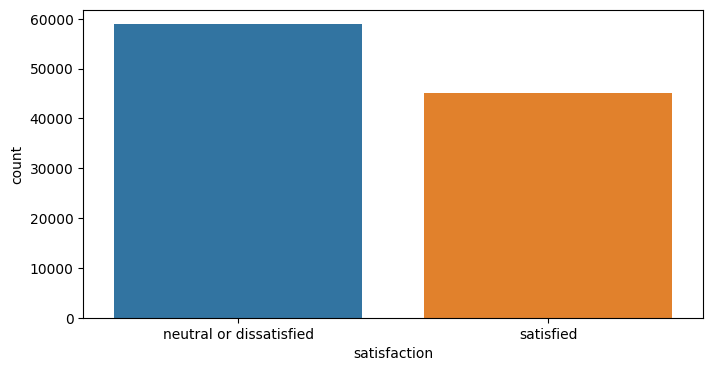

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='satisfaction')

In [10]:
(df['satisfaction'] == 'neutral or dissatisfied').sum()

58879

In [11]:
(df['satisfaction'] == 'satisfied').sum()

45025

**La Variable objetivo está desbalanceada. De momento lo voy a dejar así.**

In [12]:
#Variables numéricas
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class'] 
num_cols = df.select_dtypes(include=['number'])
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Age 

In [13]:
df['Age'].describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age Feature Distribution')

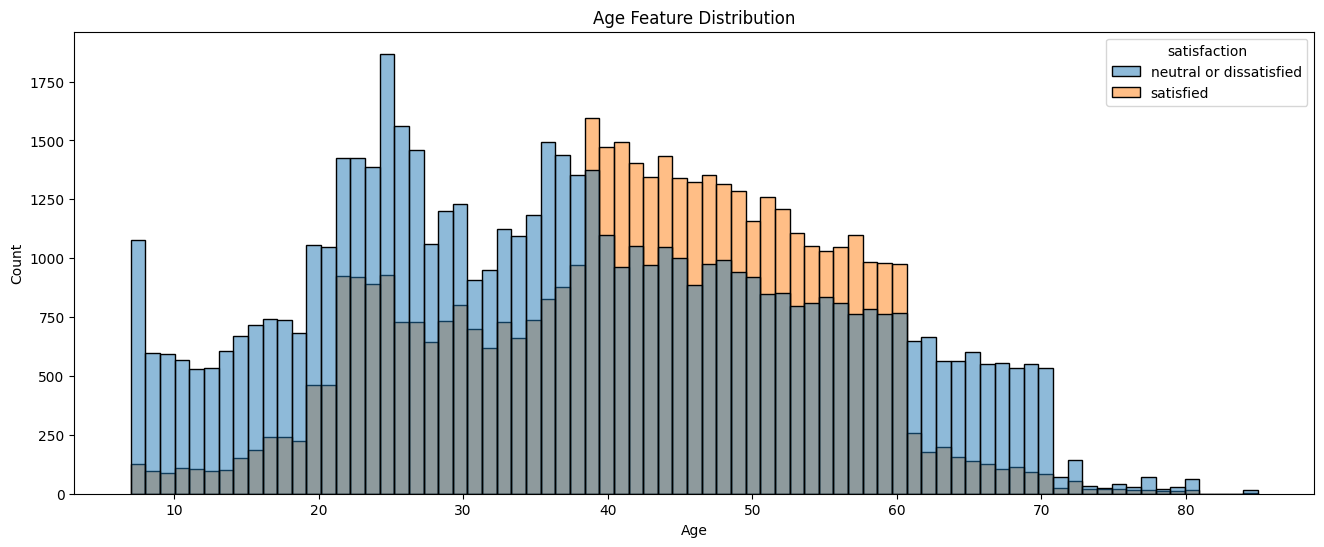

In [14]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x="Age",  hue='satisfaction')
plt.title('Age Feature Distribution')

### La columna Customer type. Tengo que pasar el valor de disloyal Customer a Disloyal Customer 

In [15]:
# Cambiar solo 'disloyal Customer' a 'Disloyal Customer'. Acordarme de ponerlo en el pipeline
df.loc[df['Customer Type'] == 'disloyal Customer', 'Customer Type'] = 'Disloyal Customer'

In [16]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


#### Hay que hacer algo con la distribución de la edad.

# ****** Para probar Streamlit sólo voy a dejar 4 columnas ***********

In [17]:
features = ["Inflight wifi service", "Food and drink", "Customer Type", "Gender"] 

In [18]:
col_drops= df.columns
col_drops

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Pre-procesamiento ##

### Imputamos missing values ###

Elimino `Unnamed` y `id`

In [19]:
#Eliminamos las columnas de los dos datasets
cols_drop = ['Unnamed: 0', 'id', 'Age', 'Type of Travel', 'Class', 'Flight Distance','Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df.drop(columns =cols_drop, inplace=True)


In [20]:
df.head()

,Gender,Customer Type,Inflight wifi service,Food and drink,satisfaction
0,Male,Loyal Customer,3,5,neutral or dissatisfied
1,Male,Disloyal Customer,3,1,neutral or dissatisfied
2,Female,Loyal Customer,2,5,satisfied
3,Female,Loyal Customer,2,2,neutral or dissatisfied
4,Male,Loyal Customer,3,4,satisfied


In [21]:
summary(df)

Dataset has 5 features and 103904 rows.


,Unique,Missing,Missing %,Duplicated,Types
Gender,2,0,0.0,103687,object
Customer Type,2,0,0.0,103687,object
Inflight wifi service,6,0,0.0,103687,int64
Food and drink,6,0,0.0,103687,int64
satisfaction,2,0,0.0,103687,object


In [22]:
cat_cols = ['Customer Type', 'Gender'] 

In [23]:
num_cols = ['Inflight wifi service', 'Food and drink']
num_cols

['Inflight wifi service', 'Food and drink']

In [24]:
imputer1 = SimpleImputer(strategy="most_frequent")     ##To fill Categorical Features.
imputer2 = SimpleImputer(strategy="mean")     # Numerical Features  

In [25]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [26]:
fill_missingno(df)

In [27]:
summary(df)

Dataset has 5 features and 103904 rows.


,Unique,Missing,Missing %,Duplicated,Types
Gender,2,0,0.0,103687,object
Customer Type,2,0,0.0,103687,object
Inflight wifi service,6,0,0.0,103687,float64
Food and drink,6,0,0.0,103687,float64
satisfaction,2,0,0.0,103687,object


In [28]:
df.isnull().sum()

Gender                   0
Customer Type            0
Inflight wifi service    0
Food and drink           0
satisfaction             0
dtype: int64

In [29]:
# Categoricas las pasamos a booleans
#df[cat_cols] = df[cat_cols].astype(bool)

In [30]:
summary(df)

Dataset has 5 features and 103904 rows.


,Unique,Missing,Missing %,Duplicated,Types
Gender,2,0,0.0,103687,object
Customer Type,2,0,0.0,103687,object
Inflight wifi service,6,0,0.0,103687,float64
Food and drink,6,0,0.0,103687,float64
satisfaction,2,0,0.0,103687,object


# Defino funcion para evaluar los modelos

In [31]:
# Testing function que junte los pipelines

def pipe_steps(num_cols, cat_cols, model):
    
    num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', MinMaxScaler())
    ])

    cat_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder(sparse=False)), 
    ])

    #Aplicar los transformer a nuestras features usando ColumnTransformer, es nuestro pre-procesamiento.
    # Ojo se van a cambiar las letra inicial a capital de Disloyal?, se hace en un pipeline? Se deja arreglado
    # en la encuesta

    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', num_transformer, num_cols),
            ('categorical', cat_transformer, cat_cols)
        ])
    
    # Estimator o modelo a aplicar
    pipeline = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('modelo', model)
    ])
    
    # Guardar el pipeline usando Pickle. Por qué  lo estoy guardando aquí?
    #with open('data_pipeline.pkl', 'wb') as file:
    #    pickle.dump(pipeline, file)
    return pipeline
    

In [32]:
def model_pred(model):
    
    # Definimos los pipeline aqui. 
    
    #pipe_steps(model, num_cols, cat_cols)
    
    num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', MinMaxScaler())
    ])

    cat_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder(sparse=False)), 
    ])

    #Aplicar los transformer a nuestras features usando ColumnTransformer, es nuestro pre-procesamiento.
    # Ojo se van a cambiar las letra inicial a capital de Disloyal?, se hace en un pipeline? Se deja arreglado
    # en la encuesta

    preprocessor = ColumnTransformer(
        transformers=[
           ('numeric', num_transformer, num_cols),
           ('categorical', cat_transformer, cat_cols)
        ])
    
    # Estimator o modelo a aplicar
    pipeline = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('modelo', model)
    ])
    
    # Guardar el pipeline usando Pickle. Por qué  lo estoy guardando aquí?
    #with open('data_pipeline.pkl', 'wb') as file:
    #    pickle.dump(pipeline, file)

    
    # Aplicar el pipeline a los datos de entrenamiento
    pipeline.fit(X_train, y_train) # ESte está correcto.
    
    # Obtiene las predicciones del modelo en los datos de entrenamiento
    y_train_pred = pipeline.predict(X_train)
    
    # --> Aplica solo las transformaciona a los datos de prueba
    X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test) 
    
    # Obtiene las predicciones del modelo en los datos de prueba transformados
    y_test_pred = pipeline.named_steps['modelo'].predict(X_test_transformed)
    
    # ********************** Calcula Métricas ********************************
        
    a = accuracy_score(y_train,y_train_pred)*100
    b = accuracy_score(y_test,y_test_pred)*100
    
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,y_test_pred, pos_label='satisfied'))
    print(f"Recall Score of {model} model is:",recall_score(y_test,y_test_pred, pos_label='satisfied'))
    print(f"F1 Score of {model} model is:",f1_score(y_test,y_test_pred, pos_label='satisfied'))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,y_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    #return pipeline

    

## Testing Pipeline y Pickle
**Chequear Cross Validation**

In [33]:
# Separar Variable Objetivo, target o variable dependiente de las variables independientes
df_f = pd.DataFrame(df)
y = df_f["satisfaction"]
X = df_f.drop(columns="satisfaction")

In [34]:
# Divido los dataset en training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Columnas categóricas y numéricas. 
num_cols = ['Inflight wifi service', 'Food and drink']
cat_cols = ['Customer Type', 'Gender'] 

In [36]:

# Nuevos pipelines
#num_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy="mean")),
#    ('scaler', MinMaxScaler())
#    ])

#cat_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy="most_frequent")),
#    ('encoder', OneHotEncoder(sparse=False)), 
#    ])

In [37]:
#Aplicar los transformer a nuestras features usando ColumnTransformer, es nuestro pre-procesamiento.

#preprocessor = ColumnTransformer(
#    transformers=[
#        ('numeric', num_transformer, num_cols),
#        ('categorical', cat_transformer, cat_cols)
#    ])

In [38]:
# model= ""
# Estimator o modelo a aplicar
#pipeline = Pipeline(steps = [
#    ('preprocessor', preprocessor),
#    ('modelo', model)
#])

In [39]:
# Se pasó a la función model_pred Por qué Sandra?
# Guardar el pipeline usando Pickle
#with open('data_pipeline.pkl', 'wb') as file:
#    pickle.dump(pipeline, file)

    
# *********************************************#
# Cargar el pipeline desde el archivo
#with open('data_pipeline.pkl', 'rb') as file:
#    loaded_pipeline = pickle.load(file)

In [40]:

# *************************** Datos de prueba finales CSV??? *************************************

# Aplicar el pipeline a los datos de prueba finales
#X_final_transformed = loaded_pipeline.transform(df_test)

# Probando los modelos

In [41]:
# Aquí se guardan los scores para después compararlos
training_score = []
testing_score = []

## 1. Logistic-Regression Model


In [42]:
model_pred(LogisticRegression(solver= 'liblinear',penalty='l1'))
#model_prediction(LogisticRegression(solver= 'liblinear',penalty='l1'))

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 70.68921959024578
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 70.55483374236081

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.6682258984597832
Recall Score of KNeighborsClassifier() model is: 0.6458976621085134
F1 Score of KNeighborsClassifier() model is: 0.6568720910671227

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


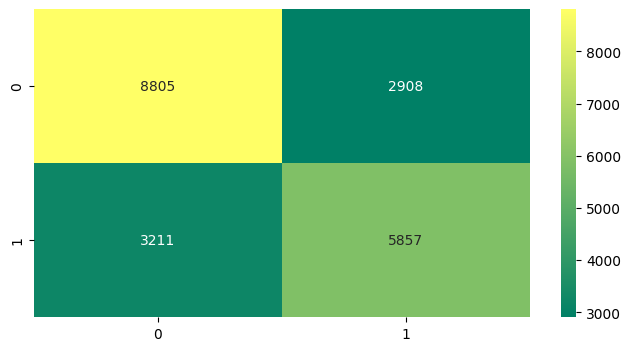

In [ ]:
# KNeighborsClassifier
model_pred(KNeighborsClassifier())
#model_prediction(KNeighborsClassifier())

In [ ]:
# SVC
#model_pred(SVC())

Accuracy_Score of AdaBoostClassifier(n_estimators=200, random_state=1) model on Training Data is: 74.57382433261553
Accuracy_Score of AdaBoostClassifier(n_estimators=200, random_state=1) model on Testing Data is: 74.48630960973966

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier(n_estimators=200, random_state=1) model is: 0.8253282653766413
Recall Score of AdaBoostClassifier(n_estimators=200, random_state=1) model is: 0.5267975297750331
F1 Score of AdaBoostClassifier(n_estimators=200, random_state=1) model is: 0.6431071620893916

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier(n_estimators=200, random_state=1) model is:


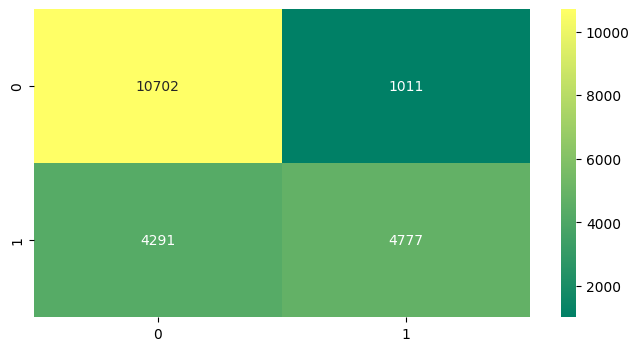

In [ ]:
model_pred(AdaBoostClassifier(n_estimators=200,  random_state=1))

# Comparación de los modelos

In [ ]:
print(training_score)
print(testing_score)

[68.32525293841655, 70.68921959024578, 74.57382433261553]
[68.55300514893412, 70.55483374236081, 74.48630960973966]


In [ ]:
models = ["Logistic Regression","KNN","Ada Boos Class"]

In [ ]:
df_comp = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [ ]:
df_comp


,Algorithms,Training Score,Testing Score
0,Logistic Regression,68.325253,68.553005
1,KNN,70.689220,70.554834
2,Ada Boos Class,74.573824,74.486310


In [ ]:
def modelo_final()

# Guardar el pipeline usando Pickle
with open('data_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

NameError: name 'pipeline' is not defined